In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
data = pd.read_csv('train.csv')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
px.imshow(data.corr(),text_auto=True,width=600)

In [13]:
data.duplicated().any()

False

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
data.drop(columns=['PassengerId','Name','SibSp','Parch','Embarked','Cabin','Ticket'],inplace=True)

In [17]:
x =data.drop(['Survived'],axis = 1)

In [18]:
y = data['Survived']

In [19]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [20]:
x['Age'].mean()

29.69911764705882

In [21]:
x['Age'].fillna(x['Age'].mean(),inplace=True)

In [22]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [23]:
x = pd.get_dummies(x,columns=['Sex'])

In [24]:
x.head(2)

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0


# Machine Learning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
accuracy = {}
precision = {}
model = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random forest': RandomForestClassifier()    
}

In [28]:
for i in model.keys():
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    accuracy[i] = accuracy_score(y_test,y_pred)
    precision[i] = precision_score(y_test,y_pred)

In [29]:
accuracy

{'Logistic Regression': 0.7847533632286996,
 'Decision Tree': 0.7533632286995515,
 'Random forest': 0.7982062780269058}

In [30]:
precision

{'Logistic Regression': 0.735632183908046,
 'Decision Tree': 0.7023809523809523,
 'Random forest': 0.7682926829268293}

In [31]:
rd = RandomForestClassifier()

In [32]:
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)

In [33]:
rd.score(x,y)

0.9326599326599326

In [34]:
print('accuracy is :',(accuracy_score(y_test,y_pred)))
print('precision is :',(precision_score(y_test,y_pred)))

accuracy is : 0.7892376681614349
precision is : 0.75


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[113,  21],
       [ 26,  63]], dtype=int64)

In [38]:
cm = pd.DataFrame(cm,columns=['Predicted_Surived','Predicted_not_Survied'],index=['Actual_Survied','Actual_not_survied'])

<AxesSubplot:>

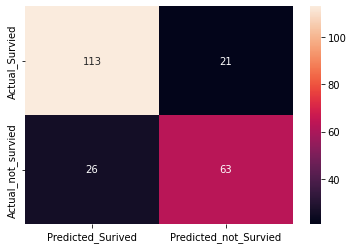

In [39]:
sns.heatmap(cm,annot=True,fmt='d')

In [40]:
import pickle

In [41]:
#with open('Model','wb')as f:
#    pickle.dump(rd,f)

#  Import Pickel And Using Model

In [42]:
x.head(2)

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0


In [43]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score

In [44]:
with open('Model','rb')as f:
    model = pickle.load(f)

In [45]:
# Pclass(3,2,1),Age,Fare,if female=1, if male =1
#Survied = 1


model.predict([[2,21,4,1,0]])[0]

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



1

In [46]:
new_data =pd.read_csv('test.csv')

In [47]:
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
new_data.Fare.max()

512.3292

In [49]:
new_data.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True)

In [50]:
new_data = pd.get_dummies(new_data,columns=['Sex'])

In [51]:
new_data.isna().sum()

Pclass         0
Age           86
Fare           1
Sex_female     0
Sex_male       0
dtype: int64

In [52]:
new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)

In [53]:
new_data['Fare'].fillna(new_data['Fare'].median(),inplace= True)

In [54]:
new_data.isna().sum()

Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [55]:
y_true = pd.read_csv('gender_submission.csv')

In [56]:
y_true.drop(['PassengerId'],axis=1,inplace=True)

In [57]:
new_data.head(2)

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,34.5,7.8292,0,1
1,3,47.0,7.0000,1,0


In [58]:
y_true.head(2)

,Survived
0,0
1,1


In [59]:
y_pred = model.predict(new_data)

In [60]:
accuracy_score(y_true,y_pred)

0.8444976076555024

In [61]:
new_data['Survied']= y_true

In [62]:
#new_data['Predicted_survied']= y_pred

In [63]:
#new_data[new_data['Predicted_survied']== new_data['Survied']].shape

In [64]:
new_data.shape

(418, 6)

In [66]:
a =new_data.columns.to_list()
a

['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Survied']

In [67]:
# Pclass(3,2,1),Age,Fare,if female=1, if male =1
#Survied = 1

model.predict([[3,21,25,1,0]])[0]

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0

In [65]:
print('Avr 1rd class :',data[data['Pclass']==1].Fare.mean())
print('Avr 2rd class :',data[data['Pclass']==2].Fare.mean())
print('Avr 3rd class :',data[data['Pclass']==3].Fare.mean())

Avr 1rd class : 84.1546875
Avr 2rd class : 20.662183152173913
Avr 3rd class : 13.675550101832993


In [74]:
a =[]
a.append(int(input('Enter Class Of Ticket "1,2,3":')))
a.append(int(input('Enter Your Age :')))
a.append(int(input('Enter Fare of Ticket :')))
a.append(int(input('Are you Male? enter 1 if Yes. enter 0 if no:')))
a.append(int(input('Are you Female? enter 1 if Yes. enter 0 if no:')))
p = model.predict([a])[0]

if p == 1:
    print('\nSurvived')
else:
    print("\nNot Survived")

Enter Class Of Ticket "1,2,3":1
Enter Your Age :35
Enter Fare of Ticket :100
Are you Male? enter 1 if Yes. enter 0 if no:1
Are you Female? enter 1 if Yes. enter 0 if no:0

Survived


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

